<a href="https://colab.research.google.com/github/self-controller/extraalearn-data-science-project/blob/main/ExtraaLearn_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score
)


import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/ExtraaLearn.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

- Observations
- Sanity checks

In [4]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [5]:
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [6]:
#Look at data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations**: 4612 entries and 15 features. Many features are objects. But age, website_visits, time_spent_on_website, page_views_per_visit and stats are all numbers.

In [9]:
#Summary of statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [10]:
#Check if there are any duplicates or null values
print(df.isnull().sum())
print("\nNum duplicated rows: ", df.duplicated().sum())

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

Num duplicated rows:  0


**Observations**: No dupliates or missing values

## EDA

- It is a good idea to explore the data once again after manipulating it.

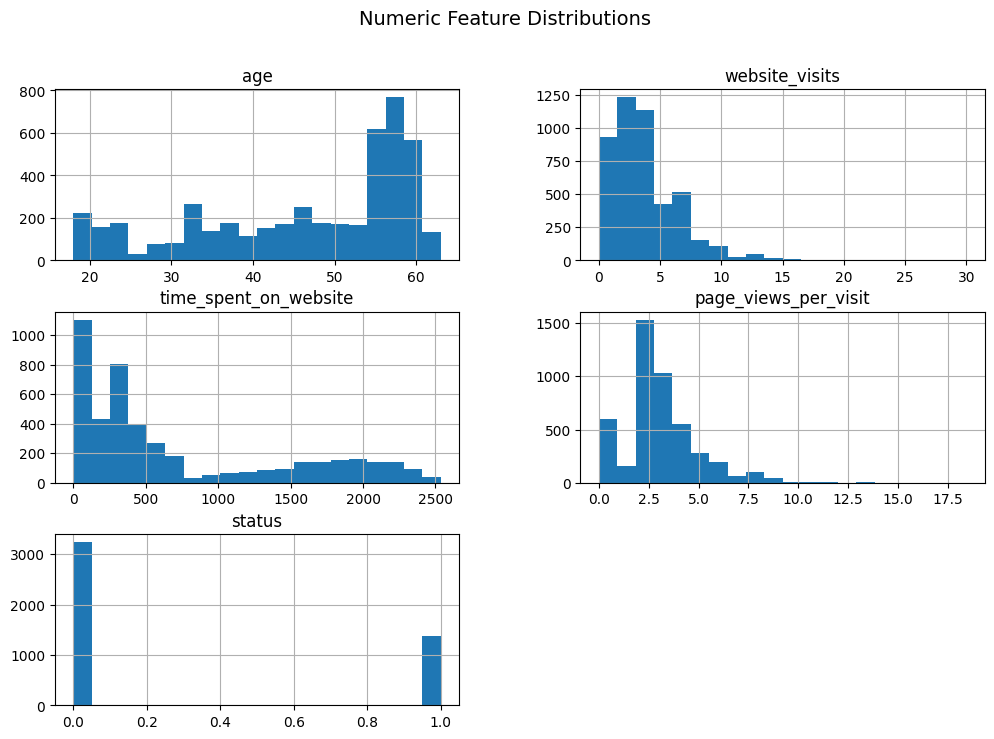

In [11]:
#Plot the numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Numeric Feature Distributions", fontsize=14)
plt.show()

Observations: Age is left skewed, while website visits, time spent on website and page views per visit are all left skewed

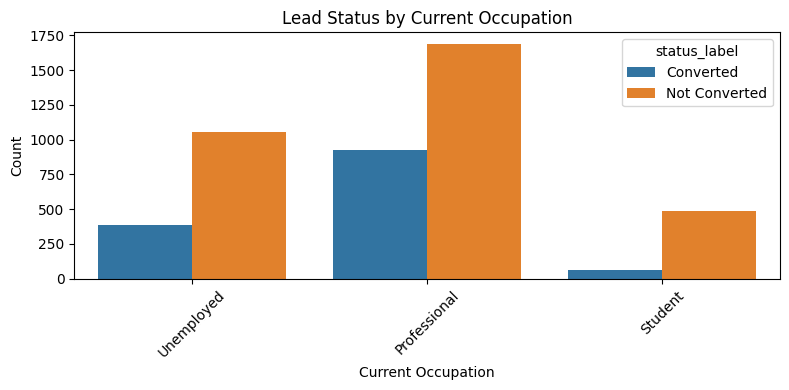

In [12]:
#Current occupation vs lead status
#Convert status_label to category form
df['status_label'] = df['status'].map({1: 'Converted', 0: 'Not Converted'})
plt.figure(figsize=(8,4))
#Plot count plot
sns.countplot(data=df, x='current_occupation', hue='status_label')
plt.title('Lead Status by Current Occupation')
plt.xlabel('Current Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

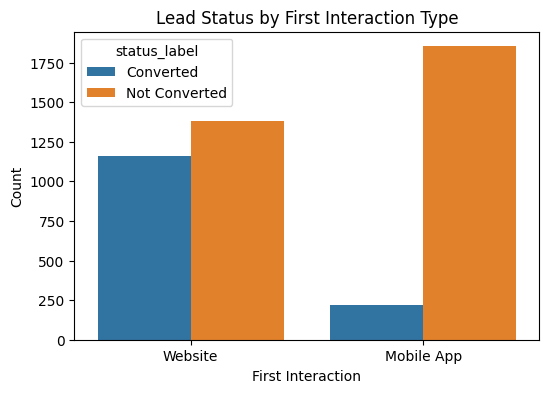

In [13]:
#First interaction vs lead status

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='first_interaction', hue='status_label')
plt.title('Lead Status by First Interaction Type')
plt.xlabel('First Interaction')
plt.ylabel('Count')
plt.show()

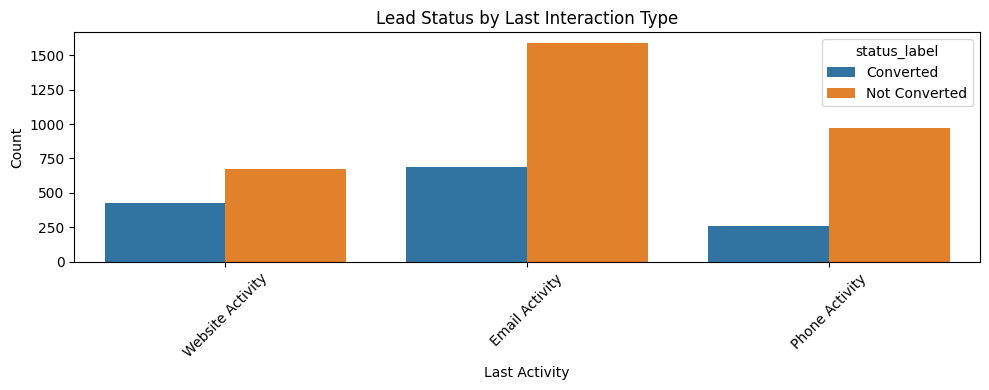

In [14]:
#Interaction type that works best (last_activity)
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='last_activity', hue='status_label')
plt.title('Lead Status by Last Interaction Type')
plt.xlabel('Last Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations**: There are more people who are not converted vs converted when their last activity was email or phone. For website activity the two are more close together but still those who were not converted are less.

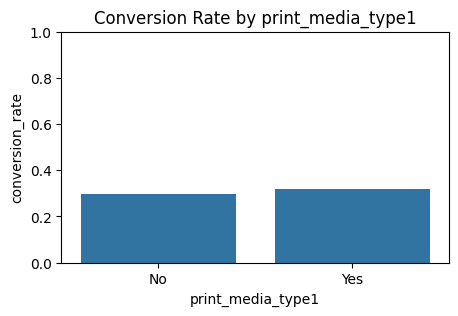

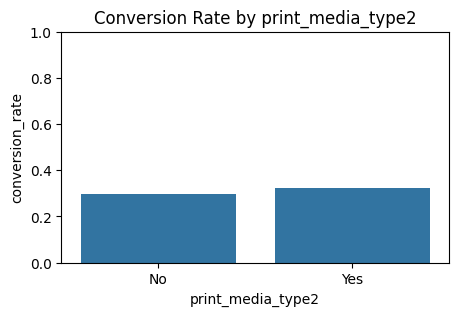

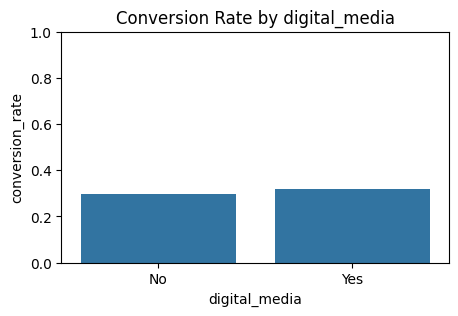

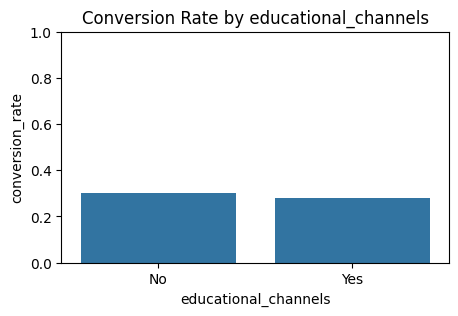

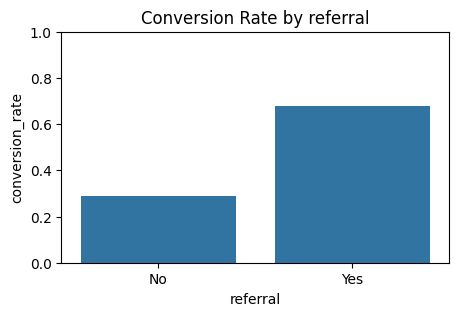

In [15]:
#Lead source channel effectiveness (print, digital, educational, referral)
channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

conversion_rates = {}
for col in channels:
    #Calculate mean for each, mean is conversion rate since status is 1 for converted and 0 for not converted
    conv = df.groupby(col)['status'].mean().rename('conversion_rate').reset_index()
    conversion_rates[col] = conv

    plt.figure(figsize=(5,3))
    sns.barplot(data=conv, x=col, y='conversion_rate')
    plt.title(f'Conversion Rate by {col}')
    plt.ylim(0,1)
    plt.show()

**Observations**: When the user heard about ExtraaLearn through media type 1 and 2, digital media, and educational channels, the conversion rate was relatively the same. When the leads heard about it through a referral the conversion rate was much higher.

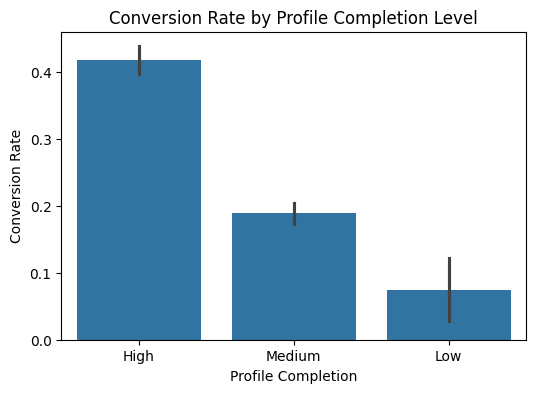

In [16]:
#Profile completeness vs conversion
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='profile_completed', y='status')
plt.title('Conversion Rate by Profile Completion Level')
plt.xlabel('Profile Completion')
plt.ylabel('Conversion Rate')
plt.show()

**Observations**: The conversion rate was much higher when the profile completion was high, then the next highest was medium and then low.

## Building a Decision Tree model

In [47]:
#Gather variables and expected values
X, Y = df.drop(['status', 'status_label'], axis=1), df['status']

#Convert categorical variables to binary representation
X = pd.get_dummies(X, drop_first=True)
X.head()

#Split training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

Testing data accuracy:  0.869268897149938

Classification Report:               precision    recall  f1-score   support

           0       0.91      0.90      0.91      2264
           1       0.77      0.79      0.78       964

    accuracy                           0.87      3228
   macro avg       0.84      0.85      0.84      3228
weighted avg       0.87      0.87      0.87      3228

Testing data accuracy:  0.8547687861271677

Classification Report:               precision    recall  f1-score   support

           0       0.90      0.89      0.90       971
           1       0.75      0.77      0.76       413

    accuracy                           0.85      1384
   macro avg       0.83      0.83      0.83      1384
weighted avg       0.86      0.85      0.86      1384



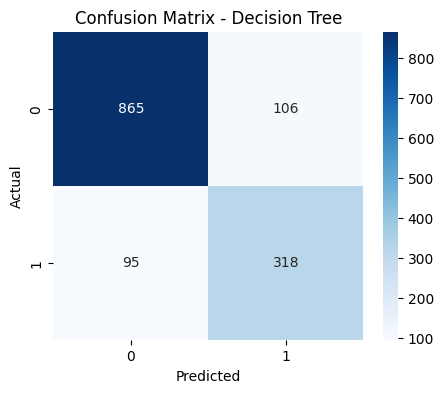

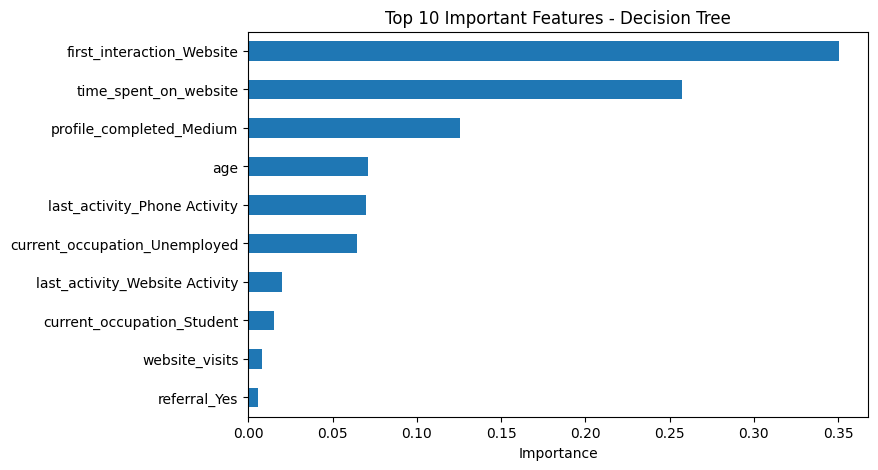

In [48]:
#Create decision tree model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

#Train
dt.fit(X_train, y_train)

#Test
y_pred_training = dt.predict(X_train)
print("Testing data accuracy: ", accuracy_score(y_train, y_pred_training))
print("\nClassification Report:", classification_report(y_train, y_pred_training))

y_pred = dt.predict(X_test)
print("Testing data accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Feature importance
importances = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
importances.head(10).plot(kind='barh')
plt.title('Top 10 Important Features - Decision Tree')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()




## Do we need to prune the tree?

I see that our model predicted the training data with a higher accuracy as opposed to the test data. This suggests a little bit of overfitting, and it may be worth it to prune the tree a little.

In [49]:
#Train base tree to get pruning path
path = DecisionTreeClassifier(random_state=23).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

models = []
for alpha in ccp_alphas:
  model = DecisionTreeClassifier(random_state=23, ccp_alpha=alpha)
  model.fit(X_train, y_train)
  models.append(model)

acc = [accuracy_score(y_test, m.predict(X_test)) for m in models]

In [50]:
best_alpha = ccp_alphas[acc.index(max(acc))]
print(best_alpha)

best_model = DecisionTreeClassifier(random_state=23, ccp_alpha=best_alpha)
best_model.fit(X_train, y_train)

#Prediction for training and testing data
best_m_y_pred_training = best_model.predict(X_train)
best_m_y_pred = best_model.predict(X_test)
print("Training data accuracy: ", accuracy_score(y_train, best_m_y_pred_training))
print("Testing data accuracy: ", accuracy_score(y_test, best_m_y_pred))

0.0018378307348704027
Training data accuracy:  0.8689591078066915
Testing data accuracy:  0.865606936416185


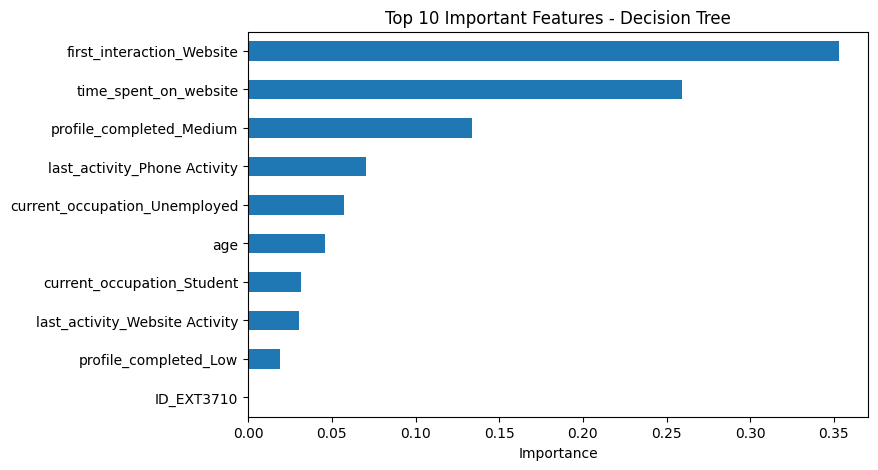


Classification Report:               precision    recall  f1-score   support

           0       0.85      0.95      0.90       971
           1       0.84      0.61      0.70       413

    accuracy                           0.85      1384
   macro avg       0.84      0.78      0.80      1384
weighted avg       0.85      0.85      0.84      1384



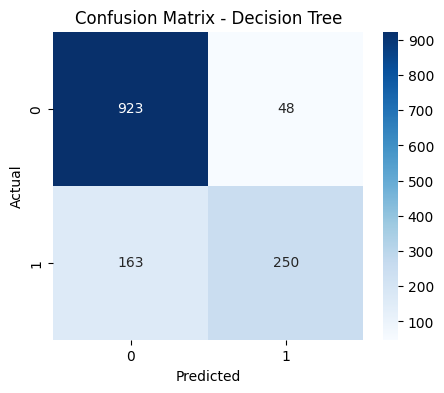

In [66]:
#Importance level of the features of the best model
importances_bm = pd.Series(best_model.feature_importances_, index = X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
importances_bm.head(10).plot(kind='barh')
plt.title('Top 10 Important Features - Decision Tree')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

print("\nClassification Report:", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




## Building a Random Forest model

In [53]:
#Initialize random forest model
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    random_state=41,
    n_jobs=-1
)

#Train model
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=200, n_jobs=-1,
                       random_state=41)

Testing data accuracy:  0.9993804213135068

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228

Testing data accuracy:  0.8475433526011561

Classification Report:               precision    recall  f1-score   support

           0       0.85      0.95      0.90       971
           1       0.84      0.61      0.70       413

    accuracy                           0.85      1384
   macro avg       0.84      0.78      0.80      1384
weighted avg       0.85      0.85      0.84      1384



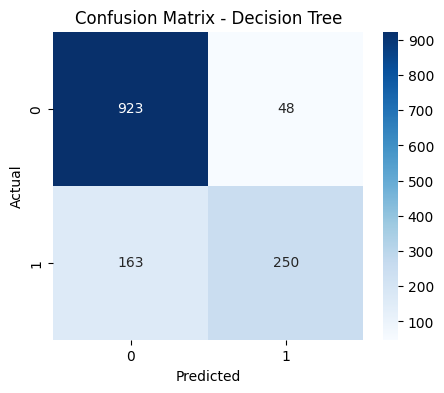

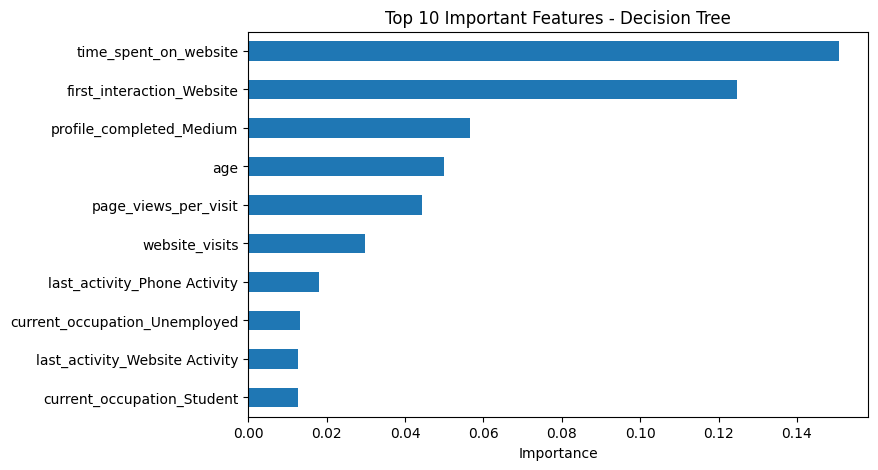

In [59]:
#Test
y_pred_training_rf = rf.predict(X_train)
print("Testing data accuracy: ", accuracy_score(y_train, y_pred_training))
print("\nClassification Report:", classification_report(y_train, y_pred_training))

y_pred_rf = rf.predict(X_test)
print("Testing data accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Check importance of features
importances_rf = pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
importances_rf.head(10).plot(kind='barh')
plt.title('Top 10 Important Features - Decision Tree')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()



## Do we need to prune the tree?

We definitely need to prune the tree. The prediction accuracy of the model is 99.9 percent while the test accuracy is around 84.7 percent, which means the model is way overfit.

In [70]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [5, 10, 20, 30],
    'min_samples_leaf': [2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', 0.5],
    'ccp_alpha': [0.0, 0.001, 0.005],
    'bootstrap': [True],
    'class_weight': [None, 'balanced']
}

#Initlize the possible parameters to try out
rf_new = RandomForestClassifier(random_state=41)
random_search = RandomizedSearchCV(estimator=rf_new, param_distributions=param_grid,
                             n_iter=50, scoring='accuracy', random_state=41, n_jobs=-1)

random_search.fit(X_train, y_train)
print("Best parameters: ", random_search.best_params_)
print("Best accuracy: ", random_search.best_score_)

Best parameters:  {'n_estimators': 200, 'min_samples_split': 30, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 15, 'class_weight': None, 'ccp_alpha': 0.0, 'bootstrap': True}
Best accuracy:  0.8636921304629563


In [71]:
#Initliaze random forest model with optimized parameters
best_rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=41)
best_rf_model.fit(X_train, y_train)

y_pred_training_brfm = best_rf_model.predict(X_train)
print("Testing data accuracy: ", accuracy_score(y_train, y_pred_training_brfm))
print("\nClassification Report:", classification_report(y_train, y_pred_training_brfm))

y_pred_brfm = best_rf_model.predict(X_test)
print("Testing data accuracy: ", accuracy_score(y_test, y_pred_brfm))
print("\nClassification Report:", classification_report(y_test, y_pred_brfm))

Testing data accuracy:  1.0

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228

Testing data accuracy:  0.8670520231213873

Classification Report:               precision    recall  f1-score   support

           0       0.89      0.92      0.91       971
           1       0.80      0.74      0.77       413

    accuracy                           0.87      1384
   macro avg       0.85      0.83      0.84      1384
weighted avg       0.87      0.87      0.87      1384



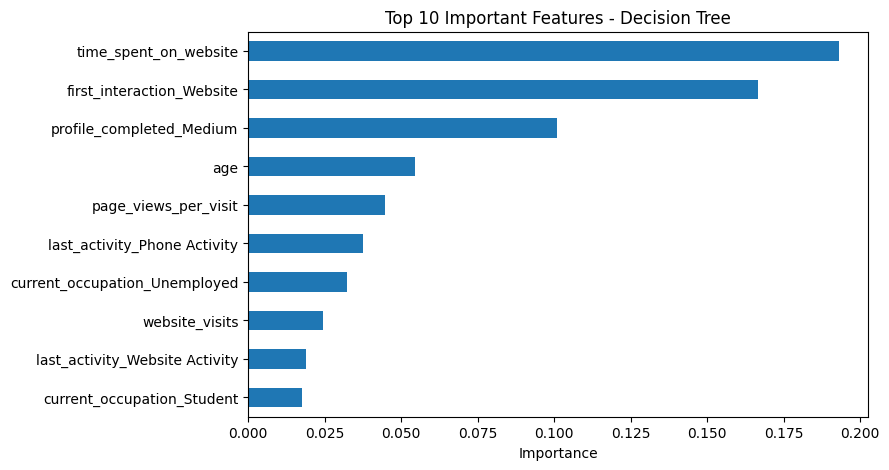

In [72]:
#Check importance of features
importances_brfm = pd.Series(best_rf_model.feature_importances_, index = X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
importances_brfm.head(10).plot(kind='barh')
plt.title('Top 10 Important Features - Decision Tree')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

## Actionable Insights and Recommendations

### **1. Focus Marketing on High-Converting Segments**
- **Occupation:** Working professionals and self-employed individuals show the highest likelihood of conversion.  
  → Prioritize marketing efforts and tailored campaigns toward these groups, especially through career-oriented platforms like LinkedIn or online education communities.

- **Source Channel:** Referrals and digital media channels consistently produce higher conversion rates.  
  → Increase investment in referral programs, influencer partnerships, and targeted digital ad campaigns.

---

### **2. Improve Low-Performing Channels**
- Print and educational media channels yield relatively lower conversion performance.  
  → Reassess their return on investment (ROI), and consider reallocating budget toward high-performing digital avenues or redesigning their campaign strategies to better engage potential learners.

---

### **3. Optimize Early Customer Interactions**
- The **first channel of interaction** significantly influences conversion outcomes.  
  → Ensure engaging, personalized, and consistent communication during initial interactions (e.g., optimized landing pages, chatbots, or inquiry forms).  
  → Track and analyze user drop-offs in the early stages to identify friction points.

---

### **4. Encourage Complete Lead Profiles**
- Leads with **more detailed or completed profiles** have a substantially higher chance of conversion.  
  → Incentivize users to complete their profiles (e.g., offer free consultations, demo lessons, or personalized course suggestions).  
  → Simplify and streamline the data entry process on the website or mobile app to reduce abandonment.

---

### **6. Continuous Monitoring and Model Refresh**
- Deploy the model to score new incoming leads on a rolling basis.  
- Track the **conversion lift** achieved by campaigns guided by model predictions.  
- Retrain the model quarterly with updated data to capture seasonality and evolving lead behavior.
